In [3]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
from IPython.display import display
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
titanic = sns.load_dataset('titanic')

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())

In [8]:
titanic['deck'] = titanic['deck'].ffill()
titanic['deck'][0] = 'C'

In [9]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [10]:
titanic = titanic.drop('embark_town', axis=1)

In [11]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [12]:
titanic['embarked'] = titanic['embarked'].fillna('S')

In [13]:
Q1=titanic['age'].quantile(0.25)
Q3=titanic['age'].quantile(0.75)
IQR=Q3-Q1

In [15]:
Q1 = titanic['age'].quantile(0.25)
Q3 = titanic['age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + whisker_width*IQR
titanic['age']=np.where(titanic['age']>upper_whisker,upper_whisker,np.where(titanic['age']<lower_whisker,lower_whisker,titanic['age']))

<AxesSubplot:xlabel='pclass', ylabel='fare'>

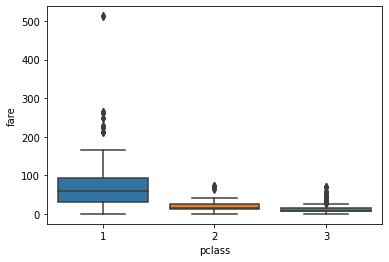

In [16]:
sns.boxplot(x='pclass', y='fare', data=titanic)


<AxesSubplot:xlabel='pclass', ylabel='age'>

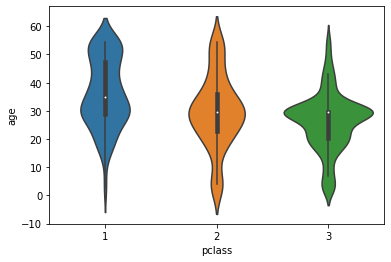

In [17]:
sns.violinplot(x='pclass', y='age', data=titanic)


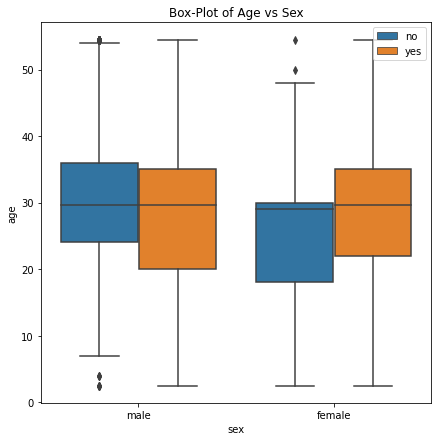

In [27]:
plt.figure(figsize=(7,7))
plt.title("Box-Plot of Age vs Sex")
sns.boxplot(x="sex", y="age",hue='alive', data=titanic)
plt.legend(loc='upper right')
plt.show()

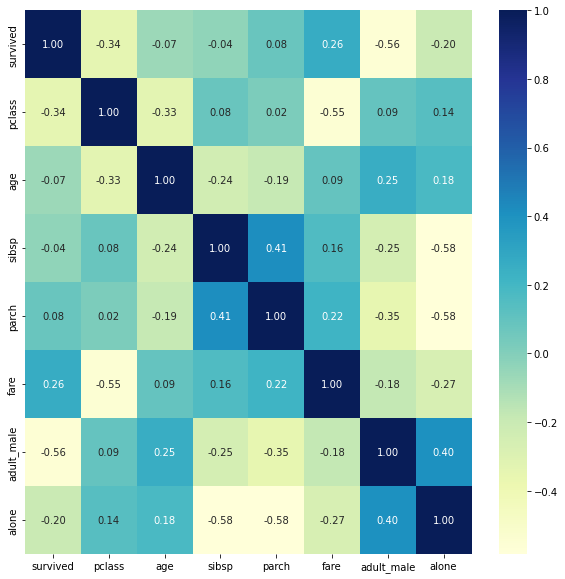

In [20]:
plt.subplots(figsize=(10, 10))
sns.heatmap(titanic.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()